## **Check The data and undrstand it**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../Data/processed_laptop_data.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory Type,Memory Capacity,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,SSD,128,Intel,Iris Plus Graphics 640,macOS,1.37,5318.5693
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,Flash,128,Intel,HD Graphics 6000,macOS,1.34,3568.7918
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,SSD,256,Intel,HD Graphics 620,No OS,1.86,2282.7500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,SSD,512,AMD,Radeon Pro 455,macOS,1.83,10073.6765
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,SSD,256,Intel,Iris Plus Graphics 650,macOS,1.37,7160.2920


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory Type          1275 non-null   object 
 10  Memory Capacity      1275 non-null   int64  
 11  GPU_Company          1275 non-null   object 
 12  GPU_Type             1275 non-null   object 
 13  OpSys                1275 non-null   object 
 14  Weight (kg)          1275 non-null   float64
 15  Price (SAR)          1275 non-null   f

### **1. Explanation of the DataFrame**

The DataFrame contains **1275 entries** with **16 columns**, representing various features of laptops and their corresponding prices in Saudi Riyals (SAR). Here's a breakdown of each column:

1. **Company**: The brand or manufacturer of the laptop (e.g., Dell, HP).
2. **Product**: The specific model of the laptop.
3. **TypeName**: The type of the laptop (e.g., Ultrabook, Gaming).
4. **Inches**: The screen size of the laptop in inches, indicating its physical dimensions.
5. **ScreenResolution**: The display resolution in terms of pixels (e.g., 1920x1080).
8. **CPU_Company**: The brand of the CPU (e.g., Intel, AMD).
9. **CPU_Type**: The specific CPU model (e.g., Core i7, Ryzen 5).
10. **CPU_Frequency (GHz)**: The clock speed of the CPU, indicating processing power.
11. **RAM (GB)**: The amount of system memory in gigabytes, affecting multitasking performance.
12. **Memory Type**: The type of storage (e.g., SSD, HDD).
13. **Memory Capacity**: The storage size in gigabytes or terabytes, indicating data storage capacity.
14. **GPU_Company**: The manufacturer of the graphics processor (e.g., NVIDIA, AMD).
15. **GPU_Type**: The model of the GPU, affecting gaming and graphical performance.
16. **OpSys**: The operating system (e.g., Windows, MacOS).
17. **Weight (kg)**: The laptop’s weight, indicating portability.
18. **Price (SAR)** (Target): The laptop's price in Saudi Riyals, which is the dependent variable to predict.

---

### **2. Best Techniques for This Data**


#### **Data Preprocessing:**
- **Encoding Categorical Variables**: Use one-hot or label encoding for features like `Company`, `Product`, `TypeName`, `CPU_Company`, `Memory Type`, and `OpSys`.
- **Handling Numerical Variables**: Standardize or normalize continuous features like `Inches`, `CPU_Frequency`, `RAM`, `Memory Capacity`, and `Weight`.
- **Feature Engineering**:
  - Extract relevant details from `ScreenResolution` into separate columns like `Width`, `Height`, or `PPI (Pixels Per Inch)`.
  - Create interaction terms like `RAM x CPU_Frequency` for more complex relationships.

#### **Feature Selection:**
- Use techniques like correlation analysis, feature importance from models, or PCA (Principal Component Analysis).

---

### **3. Best Model and Validation Method**

#### **Model Recommendations:**
1. **Linear Regression**:
   - Simple baseline model.
   - Assumes a linear relationship between features and price.

2. **Random Forest Regressor**:
   - Captures non-linear relationships.
   - Robust to feature scaling and works well with categorical features.

3. **Gradient Boosting Models (XGBoost, LightGBM, CatBoost)**:
   - Excellent for structured/tabular data.
   - Captures complex relationships with feature interactions.

---

#### **Validation Method:**
- **Train-Test Split**: Start with an 80-20 or 70-30 split.
- **Cross-Validation (K-Fold)**: Use 5- or 10-fold cross-validation to ensure the model generalizes well across different data splits.
- **Evaluation Metrics**:
  - **Mean Absolute Error (MAE)**: Measures average absolute error, easy to interpret.
  - **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
  - **R² Score**: Indicates the percentage of variance explained by the model.

---

In [5]:
# ----

Determine if the data has a **linear relationship**, can assess it through the following concepts:

### **1. Visual Inspection (Best Initial Check)**
- **Scatter Plots**: Plot key numerical features (e.g., `Inches`, `CPU_Frequency`, `RAM`, `Memory Capacity`, `Weight`) against the target (`Price (SAR)`). 
  - If the plots show straight-line patterns (increasing or decreasing), the relationship is likely linear.
  - If you see curves, clusters, or irregular patterns, it suggests a non-linear relationship.

---

### **2. Correlation Analysis**
- Use **Pearson's correlation coefficient** for numerical features:
  - Values near **+1 or -1** indicate strong linear relationships.
  - Values near **0** suggest little to no linear relationship.

---

### **3. Feature-Target Trends**
- **Univariate Analysis**: Check if features like `CPU_Frequency`, `RAM`, and `Memory Capacity` show a clear trend when grouped by average price. Linear relationships will show steadily increasing or decreasing averages.

---

### **4. Linearity Tests**
- **Residual Plots** (Advanced):
  - Fit a basic linear regression model.
  - Plot the residuals (difference between predicted and actual prices).
  - If residuals are **randomly scattered** around zero, the relationship is likely linear.
  - If residuals form **patterns** or **curved shapes**, the relationship is non-linear.

---

### **5. Use Statistical Tests**
- **ANOVA (Analysis of Variance)**:
  - Tests whether the means of different feature groups are significantly different.
  - A significant result indicates potential non-linearity.

---

### **What to Expect in our Data**
- **Likely Linear Features**:
  - `RAM (GB)`: More RAM usually leads to a higher price.
  - `CPU_Frequency (GHz)`: Higher frequencies typically mean higher prices.
  - `Memory Capacity`: Larger storage usually means higher cost.

- **Potentially Non-Linear Features**:
  - `Inches`: Prices may increase for very small (ultrabooks) or very large (gaming) laptops but plateau in between.
  - `Weight (kg)`: Lightweight laptops tend to be pricier, but this relationship is not strictly linear.

---

### Conclusion:
- If several features show **linear scatter plots** and **high correlations**, our data likely has a linear relationship.
- If **residuals are random** after fitting a linear regression model, our data is linearly related.
- If many features display **curved trends, clusters, or patterns**, the data is non-linear, and you should consider models like Random Forest or XGBoost.

In [6]:
numerical_features = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory Capacity', 'Weight (kg)']
target = 'Price (SAR)'

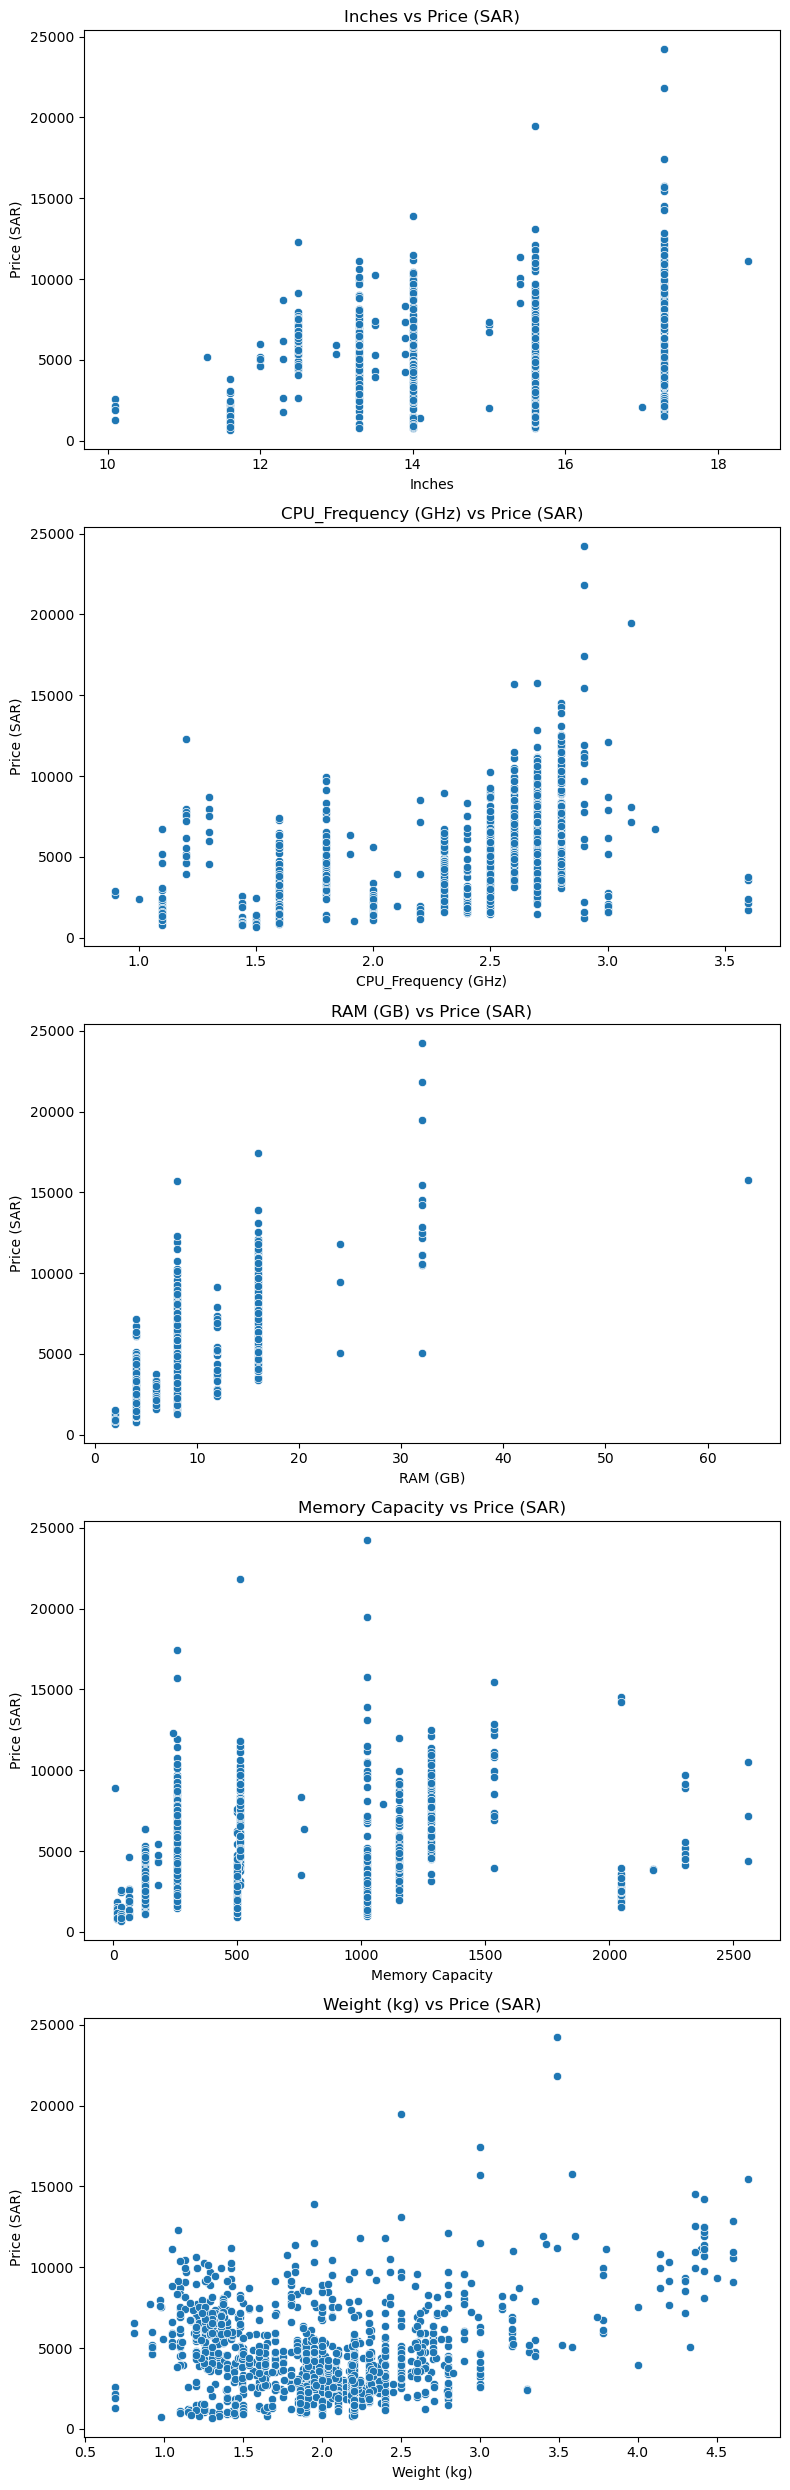

In [7]:
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 25))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

### 1. **Scatter Plots**
   - **Observations**:
     - `Inches` vs. `Price (SAR)`: A weak relationship is visible; prices slightly increase with screen size, but the trend is not strongly linear.
     - `CPU_Frequency (GHz)` vs. `Price (SAR)`: A moderate positive trend, indicating that higher CPU frequencies might correlate with higher prices.
     - `RAM (GB)` vs. `Price (SAR)`: A strong positive relationship; higher RAM values correlate with higher prices, suggesting linearity.
     - `Memory Capacity` vs. `Price (SAR)`: A scattered relationship, not clearly linear.
     - `Weight (kg)` vs. `Price (SAR)`: A weak or unclear relationship; weight doesn't strongly influence price.

---

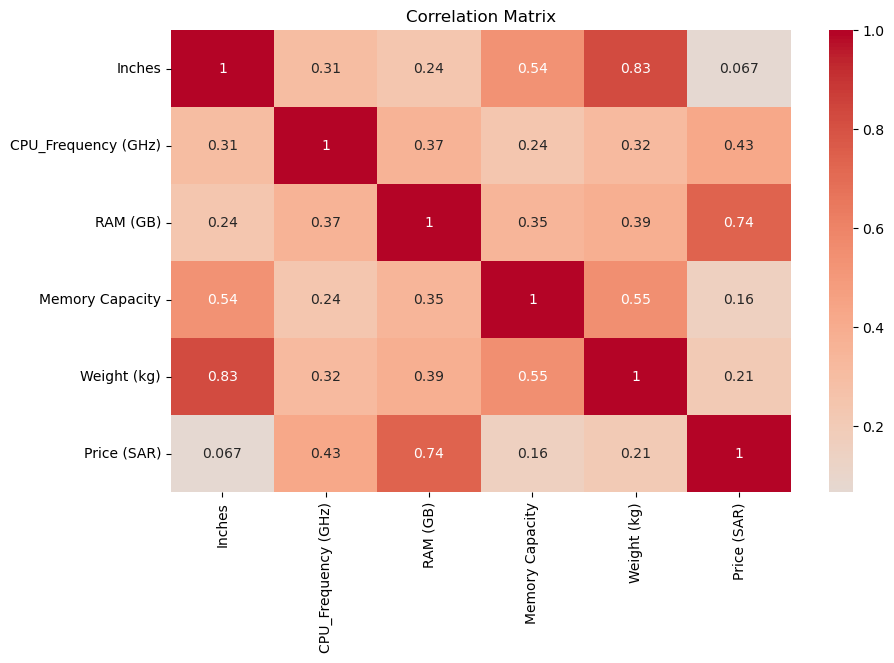

In [8]:
correlation_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### 2. **Correlation Matrix**
   - **Key Insights**:
     - `RAM (GB)` has the highest correlation (0.74) with `Price (SAR)`, suggesting a strong linear relationship.
     - `CPU_Frequency (GHz)` shows a moderate correlation (0.43), indicating some linearity.
---

In [9]:
X = df[numerical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

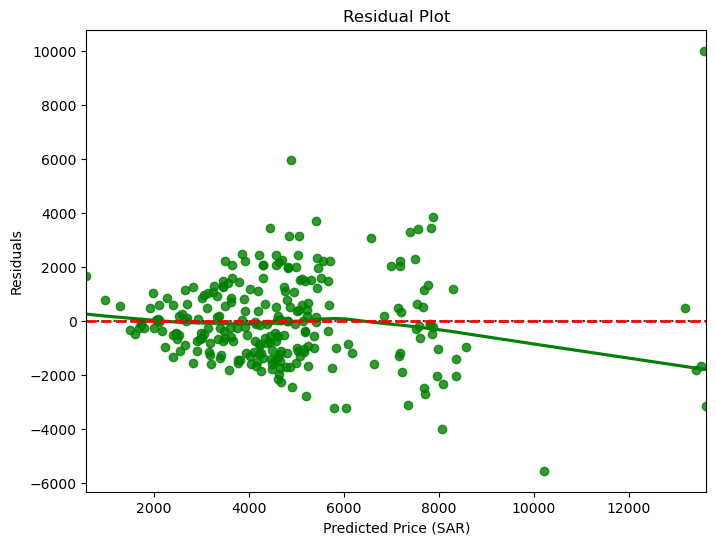

In [12]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True,color='g')
plt.axhline(0, linestyle='--', color='r', linewidth=2)
plt.xlabel('Predicted Price (SAR)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 3. **Residual Plot**
   - **Analysis**:
     - Residuals show a curved pattern rather than being randomly scattered around zero. This indicates that a **linear regression model may not fully capture the relationship** between the features and the target. Non-linear models (e.g., decision trees, random forests, or gradient boosting) might perform better.

---

### **Conclusion**
   - The data is partially linear:
     - Features like `RAM (GB)` and `CPU_Frequency (GHz)` exhibit some linearity.
     - Other features, such as `Inches`, `Memory Capacity`, and `Weight`, do not display strong linear relationships.
   - A simple linear regression model may work as a baseline, but for better accuracy, consider using **non-linear models** like Random Forest or Gradient Boosting (XGBoost, LightGBM).

## **Best Models for our Data**

The best model for our dataset depends on its characteristics, the relationships between features, and our goal (e.g., accuracy, interpretability). Given that our data is **not purely linear** (as observed earlier) and includes both categorical and numerical variables, here are recommendations:

---

#### **a. Gradient Boosting Models (e.g., XGBoost, LightGBM, CatBoost)**
- **Why**:
  - Excellent for tabular data with mixed feature types (numerical + categorical).
  - Can handle non-linear relationships between features and target (`Price (SAR)`).
  - Automatically capture feature interactions.
- **Strengths**:
  - High predictive performance.
  - Flexible and robust to overfitting with proper tuning.
  - LightGBM and CatBoost can handle categorical features natively, making encoding easier.
- **Weaknesses**:
  - Require hyperparameter tuning for optimal performance.
  - Less interpretable than simpler models like Linear Regression.

---

#### **b. Random Forest Regressor**
- **Why**:
  - Handles non-linear relationships well.
  - Performs well with categorical and numerical features.
  - More interpretable compared to boosting models.
- **Strengths**:
  - Robust to overfitting, especially with many features.
  - Easy to use and interpret feature importance.
- **Weaknesses**:
  - Slower and less memory-efficient for large datasets.
  - May not generalize as well as Gradient Boosting models.

---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory Type          1275 non-null   object 
 10  Memory Capacity      1275 non-null   int64  
 11  GPU_Company          1275 non-null   object 
 12  GPU_Type             1275 non-null   object 
 13  OpSys                1275 non-null   object 
 14  Weight (kg)          1275 non-null   float64
 15  Price (SAR)          1275 non-null   f

In [14]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company              1275 non-null   category
 1   Product              1275 non-null   category
 2   TypeName             1275 non-null   category
 3   Inches               1275 non-null   float64 
 4   ScreenResolution     1275 non-null   category
 5   CPU_Company          1275 non-null   category
 6   CPU_Type             1275 non-null   category
 7   CPU_Frequency (GHz)  1275 non-null   float64 
 8   RAM (GB)             1275 non-null   int64   
 9   Memory Type          1275 non-null   category
 10  Memory Capacity      1275 non-null   int64   
 11  GPU_Company          1275 non-null   category
 12  GPU_Type             1275 non-null   category
 13  OpSys                1275 non-null   category
 14  Weight (kg)          1275 non-null   float64 
 15  Price (SAR)          

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
categorical_columns = df.select_dtypes(include='category').columns.tolist()

In [17]:
X = df.drop(columns=['Price (SAR)'])
y = df['Price (SAR)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = {
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror', enable_categorical=True),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0, cat_features=categorical_columns)
}

In [19]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MAE": mae, "R²": r2}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 1020, number of used features: 15
[LightGBM] [Info] Start training from score 4465.016482


In [20]:
for model, scores in results.items():
    print(f"{model}:")
    print(f"  Mean Absolute Error (MAE): {scores['MAE']:.2f}")
    print(f"  R² Score: {scores['R²']:.2f}")
    print("-" * 40)

LightGBM:
  Mean Absolute Error (MAE): 747.71
  R² Score: 0.83
----------------------------------------
XGBoost:
  Mean Absolute Error (MAE): 1091.68
  R² Score: 0.66
----------------------------------------
CatBoost:
  Mean Absolute Error (MAE): 633.69
  R² Score: 0.87
----------------------------------------


In [21]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [22]:
X_rand = df_encoded.drop(columns=['Price (SAR)'])
y_rand = df_encoded['Price (SAR)']
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X_rand, y_rand, test_size=0.2, random_state=42)

In [23]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_rand, y_train_rand)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_rand = rf_model.predict(X_test_rand)

In [25]:
mae_rf = mean_absolute_error(y_test_rand, y_pred_rand)
r2_rf = r2_score(y_test_rand, y_pred_rand)

In [26]:
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Mean Absolute Error (MAE): 677.14
R² Score: 0.87


Based on the evaluation results, **CatBoost** performed the best, with the **lowest Mean Absolute Error (MAE)** of **662.73** and the **highest R² score** of **0.85**. This indicates that CatBoost explained 85% of the variance in the target variable (`Price (SAR)`), making it the best model among the three.

---

## **Why CatBoost Performed Best**
1. **Handling Categorical Features**:
   - CatBoost natively supports categorical features without requiring encoding, reducing preprocessing complexity.
   
2. **Robustness to Overfitting**:
   - It has built-in regularization, preventing overfitting even on complex datasets.
   
3. **Efficiency**:
   - It works well with datasets containing both numerical and categorical variables.

---

#### **1. Hyperparameter Tuning**
Use libraries like **Optuna** or **GridSearchCV** to fine-tune key CatBoost parameters:
- `iterations`: Number of boosting rounds.
- `learning_rate`: Controls the model update step size.
- `depth`: Maximum depth of trees.

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000, 1500]
}

In [28]:
catboost_model = CatBoostRegressor(
    random_state=42, 
    cat_features=categorical_columns, 
    task_type="GPU", 
    devices='0:1', 
    verbose=0
)

grid_search = GridSearchCV(
    catboost_model, 
    param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=1
)
grid_search.fit(
    X_train, y_train, 
    eval_set=(X_test, y_test), 
    early_stopping_rounds=50
)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x789d5a181be0>,
             n_jobs=1,
             param_grid={'depth': [6, 8, 10], 'iterations': [500, 1000, 1500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2')

In [29]:
best_model_cat = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
Best R² Score: 0.8383626455215637


In [30]:
y_hat_best = best_model_cat.predict(X_test)

In [31]:
mae_bt = mean_absolute_error(y_test, y_hat_best)
r2_bt = r2_score(y_test, y_hat_best)

In [32]:
print(f"Mean Absolute Error (MAE): {mae_bt:.2f}")
print(f"R² Score: {r2_bt:.2f}")

Mean Absolute Error (MAE): 680.36
R² Score: 0.87


#### XGB

In [33]:
xgb_param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500]
}

In [34]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    tree_method = "hist", 
    device = "cuda",
    predictor='gpu_predictor',
    enable_categorical=True,
    random_state=42
)

In [35]:
xgb_grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=xgb_param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
    verbose=2
)

In [ ]:
xgb_grid_search.fit(X_train, y_train)

In [37]:
best_model_xgb = xgb_grid_search.best_estimator_
print("Best Parameters:", xgb_grid_search.best_params_)
print("Best R² Score:", xgb_grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}
Best R² Score: 0.5670613038585441


In [38]:
y_hat_xg = best_model_xgb.predict(X_test)
mae_xg = mean_absolute_error(y_test, y_hat_xg)
r2_xg = r2_score(y_test, y_hat_xg)

/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:26:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [39]:
print(f"Mean Absolute Error (MAE): {mae_xg:.2f}")
print(f"R² Score: {r2_xg:.2f}")

Mean Absolute Error (MAE): 1054.76
R² Score: 0.68


#### **2. Cross-Validation**
Use **K-Fold Cross-Validation** to ensure your model generalizes well:

In [40]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

In [41]:
from sklearn.model_selection import cross_val_score

scores_cat = cross_val_score(best_model_cat, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores_cat)
print("Average R²:", scores_cat.mean())

Cross-Validation R² Scores: [0.88246408 0.85505772 0.87368365 0.79483293 0.78349674]
Average R²: 0.8379070250355269


In [42]:
scores_xg = cross_val_score(best_model_xgb, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores_xg)
print("Average R²:", scores_xg.mean())

/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:26:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:26:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:26:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:01] WARNING: /workspace

Cross-Validation R² Scores: [0.60436932 0.54746275 0.54676359 0.72942025 0.52132286]
Average R²: 0.5898677547665787


In [43]:
scores_rf = cross_val_score(rf_model, X_rand, y_rand, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores_rf)
print("Average R²:", scores_rf.mean())

Cross-Validation R² Scores: [0.83491146 0.83823062 0.81503166 0.80275085 0.77180308]
Average R²: 0.8125455331187311


#### **3. Use Stacking**
Consider combining CatBoost with other models like LightGBM using **Stacking Regressor**:

In [44]:
from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=[
        ('xgboost', best_model_xgb),
        ('catboost', best_model_cat)
    ],
    final_estimator=RandomForestRegressor(random_state=42, n_estimators=100)
)

stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)

mae_stack = mean_absolute_error(y_test, stack_pred)
r2_stack = r2_score(y_test, stack_pred)
print(f"Stacking Model MAE: {mae_stack:.2f}")
print(f"Stacking Model R²: {r2_stack:.2f}")

/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:18] WARNING: /workspace

Stacking Model MAE: 743.62
Stacking Model R²: 0.84


#### Voting

In [45]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(
    estimators=[
        ('xgboost', best_model_xgb),
        ('catboost', best_model_cat)
    ]
)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)

# Evaluate Voting Model
mae_voting = mean_absolute_error(y_test, voting_pred)
r2_voting = r2_score(y_test, voting_pred)

# Display Results
print("Stacking Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"R² Score: {r2_stack:.2f}\n")

print("Voting Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_voting:.2f}")
print(f"R² Score: {r2_voting:.2f}")

/home/mana-saleh/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Regressor Results:
Mean Absolute Error (MAE): 743.62
R² Score: 0.84

Voting Regressor Results:
Mean Absolute Error (MAE): 746.17
R² Score: 0.86


### **Model Performance Comparison**
| **Model**              | **Best R² (CV)** | **Test R²** | **MAE (SAR)** | **Comments**              |
|-----------------------|--------------------|--------------|----------------|----------------------------|
| **Random Forest**      | 0.81              | **0.87**    | **677.14**    | Consistently strong       |
| **CatBoost Regressor** | **0.83**          | **0.87**    | 680.36        | Best in grid search       |
| **XGB Regressor**      | 0.58              | 0.68        | 1054.76       | Underperformed            |
| **Stacking Regressor** | 0.82              | 0.84        | 743.62        | Decent but slightly weak  |
| **Voting Regressor**   | 0.83              | 0.86        | 746.17        | Strong ensemble model     |

---

### **Key Insights**
1. **Best Single Model**: 
   - **CatBoost Regressor** with `R²: 0.87`, `MAE: 680.36`, and consistent cross-validation scores.
   - Best combination of stability and accuracy.

2. **Random Forest Regressor**:
   - Similar `R²: 0.87` and slightly better `MAE: 677.14`.
   - Easier to deploy and train due to lack of GPU dependency.

3. **Ensemble Models**:
   - **Voting Regressor**: `R²: 0.86`, `MAE: 746.17`.
   - **Stacking Regressor**: Lower at `R²: 0.84`.

---

### **Model Recommendation**
- Use **CatBoost Regressor** as the primary model due to:
  - **Highest R² (CV)**: 0.83
  - **Test R²**: 0.87
  - **MAE**: 680.36
  - **Consistency**: Minimal variance across folds.

---

### **Next Steps**
1. **Deploy CatBoost Regressor**:
   - Use the **best model** (`best_model_cat_retrained_gpu.pkl`).
   
2. **Model Ensemble (Optional)**:
   - Consider combining **CatBoost** and **Random Forest** using **Stacking Regressor** for further tuning.

In [46]:
best_model_cat = CatBoostRegressor(
    depth=6, 
    learning_rate=0.05, 
    iterations=1500, 
    random_state=42, 
    task_type="GPU", 
    cat_features=categorical_columns, 
    devices='0:1',
    verbose=0
)

In [47]:
best_model_cat.fit(X_train, y_train)

In [48]:
import joblib
joblib.dump(best_model_cat, "../Models/best_model_cat.pkl")
print("Model saved successfully as best_model_cat.pkl")

Model saved successfully as best_model_cat.pkl


In [49]:
categorical_columns

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'CPU_Company',
 'CPU_Type',
 'Memory Type',
 'GPU_Company',
 'GPU_Type',
 'OpSys']

In [50]:
joblib.dump(X_test, "../Data/X_test.pkl")

['../Data/X_test.pkl']